***Desafio***
1. Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles (Refinar el grafico: Titulos, aumentar el tamano de labels, colores, conclusion de la informacion)

In [8]:
import pandas as pd
#Acceder a nuestro dataset y modificar el nombre de las columnas.
inmuebles = pd.read_csv('inmuebles_bogota.csv')
columnas = {'Baños': 'Banos', 'Área': 'Area'}
inmuebles = inmuebles.rename(columns=columnas)
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [9]:
valor = inmuebles.Valor.str.split(expand=True)
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000
pd.set_option('display.precision',2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


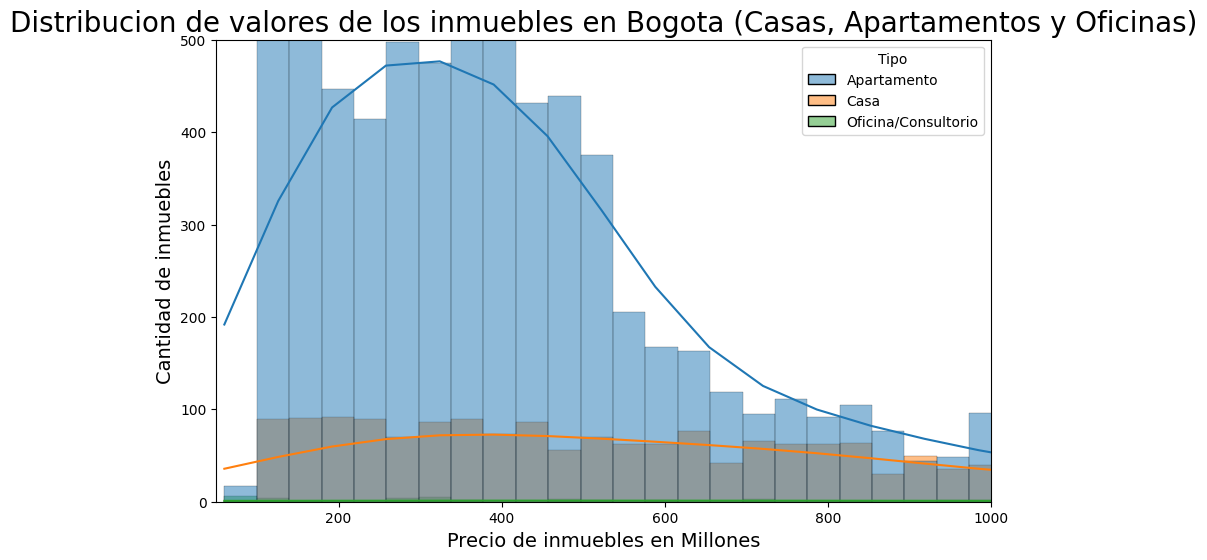

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

inmuebles_filtrados = inmuebles.query("Tipo in ['Casa', 'Apartamento', 'Oficina/Consultorio']")
plt.figure(figsize=(10,6))
grafica = sns.histplot(data=inmuebles_filtrados, x='Precio_Millon', kde=True, hue='Tipo')
grafica.set_title('Distribucion de valores de los inmuebles en Bogota (Casas, Apartamentos y Oficinas)', fontsize=20)
plt.xlim((50,1000))
plt.ylim((0,500))
plt.xlabel('Precio de inmuebles en Millones', fontsize=14)
plt.ylabel('Cantidad de inmuebles', fontsize=14)
plt.show()

### Conclusion
El histograma de la distribucion de valores de los inmuebles en Bogota presenta unicamente los apartamentos, casas y oficinas. Se observa que existe mayor inmuebles de apartamentos en venta y el menor son las oficinas.

***Desafio***
2. Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable

In [11]:
area_promedio = inmuebles.groupby('Barrio')['Area'].mean().reset_index().sort_values('Area', ascending=False)
top_10_area = area_promedio.head(10)
top_10_area

,Barrio,Area
92,Modelia,4316.75
83,Libertador,642.00
11,Bosa Piamonte,400.00
73,La Soledad,378.62
114,Restrepo,336.50
127,Santa Librada,328.00
80,Las Ferias,320.00
124,Santa Ana,309.38
141,Veraguas,302.67
7,Bellavista Occidental,286.20


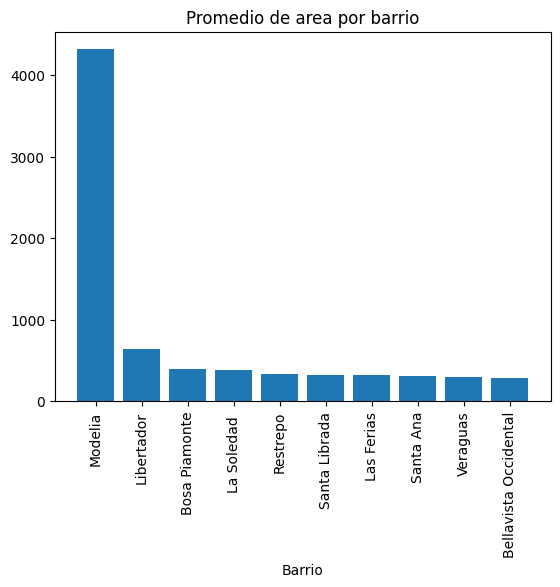

In [12]:
import matplotlib.pyplot as plt
plt.bar(top_10_area['Barrio'], top_10_area['Area'])
plt.xticks(rotation=90)
plt.xlabel("Barrio")
plt.title("Promedio de area por barrio")
plt.show()